In [3]:
import pandas
import numpy as np
import matplotlib as plt

In [4]:
#Lecture du fichier
dataframe_collisions = pandas.read_csv("collisions_routieres.csv")

In [5]:
#Compte du nombre d'accidents implicants un blessé grave
blesses = dataframe_collisions.groupby(["NB_BLESSES_GRAVES"])["NB_BLESSES_GRAVES"].count()

In [6]:
#Calcul du nombre d'accidents par année
nmbr_accidents = dataframe_collisions.groupby("AN")["NO_SEQ_COLL"].count()

In [7]:
#Calcul du nombre d'accident n'implicant pas de blessés
total_blesses = nmbr_accidents.sum() - blesses
pas_de_blesses = total_blesses
total_blesses_graves = pas_de_blesses[0]

In [8]:
#Impression du nombre d'accidents et d'accidents implicants au moins un blessé grave
print("Sur", nmbr_accidents.sum(), "accidents, il y a eu", total_blesses_graves, "accidents avec des blessés graves.")

Sur 204010 accidents, il y a eu 1697 accidents avec des blessés graves.


In [9]:
#Calcul pourcentage de blessés graves 
moyenne_blesses = (((blesses[0] * 0) + (blesses[1] * 1) + (blesses[2] * 2) + (blesses[3] * 3) + (blesses[4] * 4)) / nmbr_accidents.sum())

In [10]:
#Impression du pourcentage de chance qu'un accident implique un blessé grave
print("En moyenne, il y a", moyenne_blesses *100, "% de chance qu'un accident contienne un blessé grave à Montréal entre 2012 et 2020")

En moyenne, il y a 0.8921131317092299 % de chance qu'un accident contienne un blessé grave à Montréal entre 2012 et 2020


In [11]:
#Calcul nombre de morts par an
nmbr_morts = dataframe_collisions.groupby(["AN"])["NB_MORTS"].sum()

Pourcentage d'accidents mortels en fonction des années
AxesSubplot(0.125,0.125;0.775x0.755)
Il y avait  0.1261568612319675 % de chance de mourir dans un accident de la route à Montréal entre 2012 et 2020


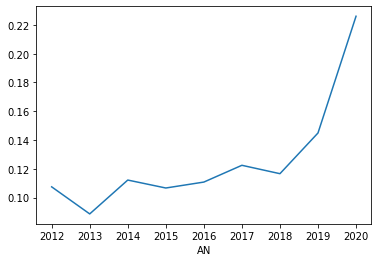

In [12]:
#Impression du pourcentage d'accidents mortels en fonction des années
print("Pourcentage d'accidents mortels en fonction des années")
print(((nmbr_morts / nmbr_accidents) *100).plot())
print("Il y avait ",((nmbr_morts / nmbr_accidents) *100).mean(),"% de chance de mourir dans un accident de la route à Montréal entre 2012 et 2020")

In [11]:
#Calcul et impression des statistiques d'accidents en fonction de la limite de vitesse
tableau_vitesse = dataframe_collisions.groupby("VITESSE_AUTOR").agg({"NB_MORTS" : ['sum'], "NB_BLESSES_GRAVES" : ['sum'], "NO_SEQ_COLL" : ['count']})
tableau_vitesse = tableau_vitesse.rename(columns={'NB_MORTS': 'Nombre de morts', 'NB_BLESSES_GRAVES': 'Blessés graves', 'NO_SEQ_COLL': "Nombre d'accidents"})
print("Statistiques d'accidents en fonction de la limite de vitesse")
print(tableau_vitesse)

Statistiques d'accidents en fonction de la limite de vitesse
              Nombre de morts Blessés graves Nombre d'accidents
                          sum            sum              count
VITESSE_AUTOR                                                  
10.0                        2              6               1438
20.0                        0              2                414
30.0                       13             72               8134
40.0                       31            232              28872
50.0                      133           1030              82765
60.0                        3             22               1380
70.0                        0              5                486
80.0                        0              0                 48
90.0                        1              1                 76
100.0                       0              0                 35


In [12]:
#Calcul et impression de la corrélation entre la vitesse autorisée lors de l'accident et le nombre de blessés grave
tableau_correlation = dataframe_collisions[["VITESSE_AUTOR","NB_BLESSES_GRAVES"]]
print("Corrélation entre la vitesse autorisée lors de l'accident et le nombre de blessés grave")
print(tableau_correlation.corr(method='pearson'))

Corrélation entre la vitesse autorisée lors de l'accident et le nombre de blessés grave
                   VITESSE_AUTOR  NB_BLESSES_GRAVES
VITESSE_AUTOR           1.000000           0.016132
NB_BLESSES_GRAVES       0.016132           1.000000
